<html>
    <h3>Let's start with importing necessary libraries.</h3>
</html>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from tensorflow import keras
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier

<html>
    <h3>Now, Let's start analyzing the given dataset.</h3>
</html>

In [2]:
# Loading the dataset
df=pd.read_csv("D:\IDFC Round 2\Training data file.csv")
df

,Customer_No,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,...,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
0,1,3,61749,38,100.0,5,NaN,0.0,NaN,Yes,...,1977,19.0,0.750,46,NaN,NaN,0,5527.0,15,0
1,2,1,30831,68,100.0,1,NaN,0.0,NaN,Yes,...,1990,2.0,0.500,33,NaN,NaN,0,12104.0,2,0
2,3,1,56708,39,50.0,-3,NaN,0.0,NaN,Yes,...,1995,25.0,1.000,28,NaN,0.0,1,153179.0,8,0
3,4,0,43551,76,NaN,0,NaN,0.0,NaN,No,...,1997,0.0,NaN,26,NaN,NaN,2,181589.0,6,0
4,5,3,15287,23,33.0,11,NaN,0.0,NaN,Yes,...,1995,19.0,0.375,28,NaN,NaN,1,10661.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81248,81249,1,34938,100,100.0,3,NaN,NaN,NaN,Yes,...,1997,5.0,0.500,26,NaN,NaN,3,134411.0,-7,0
81249,81250,2,53276,100,100.0,7,NaN,NaN,68609.0,Yes,...,1989,1.0,0.500,34,NaN,NaN,0,11745.0,14,0
81250,81251,0,38605,100,100.0,-2,NaN,NaN,NaN,Yes,...,1991,0.0,NaN,32,NaN,NaN,1,9367.0,12,0
81251,81252,2,36472,100,0.0,1,NaN,NaN,NaN,Yes,...,1993,21.0,0.400,30,NaN,NaN,0,10149.0,10,0


In [3]:
print(f"The training dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The training dataset contains 81253 rows and 22 columns.


<html>
<br>
</html>

In [4]:
# Before going to statistical part, let's understand the columns given in the dataset.
# Understand how these columns will affect the target column.

In [5]:
df.columns

Index(['Customer_No', 'N_Default_L3m', 'Branch_Code', 'Max_Utilization',
       'Max_Perc_Def_Chg_Pending', 'N_Family_Member',
       'Max_Ratio_OC_Pending_POS', 'N_PosBkt_L3m', 'CoAp_Income',
       'Ever_Default_L12M', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'Total_Field_Trails', 'Total_Resolved', 'N_Enq_L9m',
       'Max_Loan_Balance_Others', 'N_WorkEx_Yr', 'Target_Flag'],
      dtype='object')

<html>
    <br>
</html>

<!DOCTYPE html>
<html lang="en">
<body>
    <h3>N_Default_L3m </h3> 
    <p>
        This column depicts number of times a particular customer didn't pay his emi in the last three months.
    </p>
    <br>
    <h3>Max_Utilization </h3> 
    <p>
        This column depicts the maximum ratio of outstanding amount of the previous month to current month.
    </p>
    <br>
    <h3> Max_Perc_Def_Chg_Pending </h3> 
    <p>
        This column depicts the maximum percentage of default charges pending.
    </p>
    <br>
    <h3> N_Family_Member </h3> 
    <p>
        Number of members in the family of the customer.
    </p>
    <br>
    <h3> Max_Ratio_OC_Pending_POS </h3> 
    <p>
        Max ratio of overdue charges pending to current month outstanding balance.
    </p>
    <br>
    <h3> N_PosBkt_L3m </h3> 
    <p>
        Number of times customer consecutively defaulted in the last three months.
    </p>
    <br>
    <h3> CoAp_Income </h3> 
    <p>
        Income of co-applicant.
    </p>
    <br>
    <h3> Ever_Default_L12M </h3> 
    <p>
        Has the customer ever defaulted in last 12 months ["Yes" or "NO"].
    </p>
    <br>
    <h3> Perc_Paymode_Online </h3> 
    <p>
        Percentage of payments that are paid through online modes. 
    </p>
    <br>
    <h3> Perc_Repay_Fail </h3> 
    <p>
        Percentage of times repayment failure. 
    </p>
    <br>
    <h3> Max_DPD_L3m </h3> 
    <p>
        Max days delay in repayment in last 3 months. 
    </p>
    <br>
    <h3> Perc_Paymode_Cheq_Fail </h3> 
    <p>
        Percentage of times repayment mode was cheque and was not cleared. 
    </p>
    <br>
    <h3> Age </h3> 
    <p>
        Age of the customer. 
    </p>
    <br>
    <h3> Total_Field_Trails </h3> 
    <p>
        Total number of customer visits done by Field representative. 
    </p>
    <br>
    <h3> Total_Resolved </h3> 
    <p>
        Number of times resolved through Calling or Field. 
    </p>
    <br>
    <h3> N_Enq_L9m </h3> 
    <p>
        Number of times enquires for new loans done by customer in last 9 months. 
    </p>
    <br>
    <h3> Max_Loan_Balance_Others </h3> 
    <p>
        Maximum outstanding balance of loans taken other than IDFC. 
    </p>
    <br>
    <h3> N_WorkEx_Yr </h3> 
    <p>
        Number of years of work experience. 
    </p>
    <br>
    <h3> Target_Flag </h3> 
    <p>
        Probability of a customer not paying EMI in the next month
        [customer didn't pay EMI = 1 and customer paid EMI = 0]. 
    </p>
</body>
</html>

<html>
<br>
</html>

<html>
    <p></p>
    <h3> Plotting a bar graph to know how many people from each defaulted category pays an emi this month. </h3>
    <br>
</html>

In [6]:
defaulted_category_values=df['N_Default_L3m'].values
defaulted_category_values

array([3, 1, 1, ..., 0, 2, 1], dtype=int64)

In [7]:
people_in_each_defaulted_category=np.unique(defaulted_category_values,return_counts=True)
people_in_each_defaulted_category

(array([0, 1, 2, 3], dtype=int64),
 array([24893, 16608, 16971, 22781], dtype=int64))

In [8]:
times_defaulted_in_last_three_months_paid_emi=df['N_Default_L3m'].loc[df['Target_Flag']==0].values

In [9]:
temp_array=np.unique(times_defaulted_in_last_three_months_paid_emi,return_counts=True)
temp_array

(array([0, 1, 2, 3], dtype=int64),
 array([23034, 14524, 14233, 19678], dtype=int64))

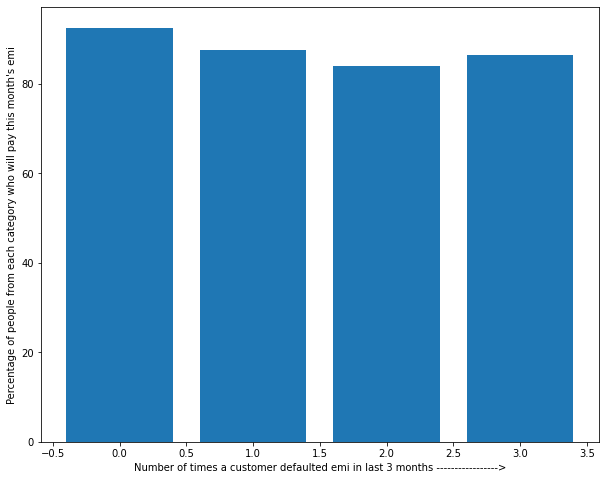

In [10]:
plt.figure(figsize=(10,8))
plt.bar(temp_array[0],temp_array[1]/people_in_each_defaulted_category[1]*100)
plt.xlabel('Number of times a customer defaulted emi in last 3 months ----------------->')
plt.ylabel('Percentage of people from each category who will pay this month\'s emi')
plt.show()

In [11]:
# From the above bar graph we can say that people from various defaulted categories have almost 
# same probability of paying an emi this month

<html>
<br>
</html>

In [12]:
total_utilization_values=df['Max_Utilization'].values

In [13]:
temp_array=np.unique(total_utilization_values,return_counts=True)
temp_array

(array([ 17,  18,  19,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        100], dtype=int64),
 array([   15,     9,     1,     4,    92,     2,    13,   195,    72,
           22,   196,    26,    81,   277,    23,    80,   805,     7,
            2,   494,  4871,    13,    57,   343,    15,  1769,   140,
          596,   325,     6,    15,     6,  7148,  2826,     8,    16,
           10,   302,   973,  1273,    76,    98,    74,   340,   956,
         6927,   329,   139,  3021,  1640,    30,    10,   112,  1329,
           79,   283,    28,  8688,    48,    11,  1141,    62,   363,
            4,   374,  4122,    32,  

In [14]:
max_utilization_values_emi_paid=df['Max_Utilization'].loc[df['Target_Flag']==0].values

In [15]:
temp_array2=np.unique(max_utilization_values_emi_paid,return_counts=True)
temp_array2

(array([ 17,  18,  19,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        100], dtype=int64),
 array([   14,     8,     1,     4,    86,     2,    13,   180,    67,
           21,   181,    23,    73,   251,    20,    73,   709,     7,
            2,   441,  4230,    12,    53,   315,    11,  1554,   125,
          523,   291,     5,    14,     4,  6177,  2550,     7,    14,
            9,   268,   858,  1117,    67,    87,    70,   311,   835,
         6126,   301,   128,  2617,  1468,    29,     9,    98,  1178,
           74,   265,    25,  7719,    43,    10,  1029,    60,   333,
            4,   338,  3568,    30,  

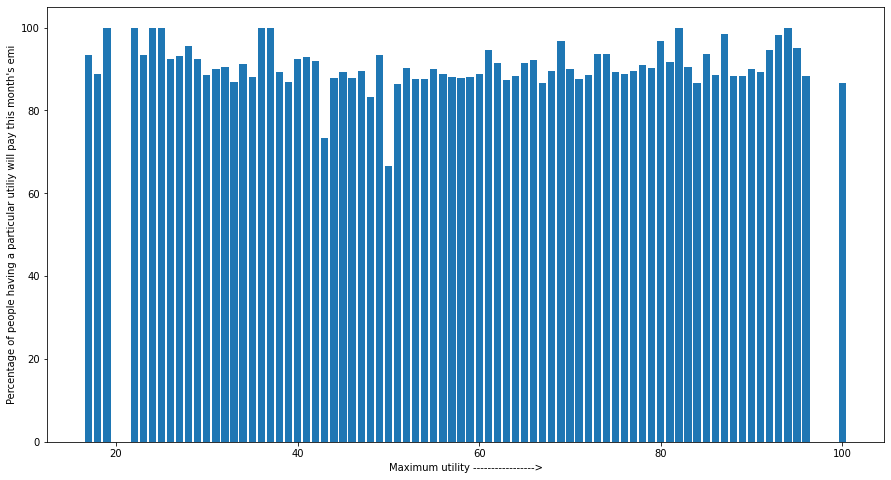

In [16]:
plt.figure(figsize=(15,8))
plt.bar(temp_array2[0],temp_array2[1]/temp_array[1]*100)
plt.xlabel('Maximum utility ----------------->')
plt.ylabel('Percentage of people having a particular utiliy will pay this month\'s emi')
plt.show()

<html>
<br>
</html>

<html>
    <br>
</html>

In [17]:
# Let's see the values in the column N_Family_Member
arr=df['N_Family_Member'].values
arr_value_counts=np.unique(arr,return_counts=True)
print(arr_value_counts)

(array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
      dtype=int64), array([4865, 4834, 4792, 4805, 4693, 4711, 4715, 4779, 4716, 4720, 4910,
       4727, 4821, 4874, 4740, 4785, 4766], dtype=int64))


In [18]:
# We can see negative values in count of family number which is not possible. So lets change the sign for the negatively count.
for i in range(len(arr)):
    if arr[i]<0:
        arr[i]=-1*arr[i]
arr

array([ 5,  1,  3, ...,  2,  1, 10], dtype=int64)

In [19]:
arr_value_counts=np.unique(arr,return_counts=True)
print(arr_value_counts)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64), array([4711, 9408, 9584, 9508, 9554, 9775, 4727, 4821, 4874, 4740, 4785,
       4766], dtype=int64))


In [20]:
df['N_Family_Member'].loc[df['N_Family_Member']<0].sum()

0

<html>
    <br>
</html>

In [21]:
matrix=df.corr().round(2)
matrix

,Customer_No,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Perc_Paymode_Online,...,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,1.00,-0.12,0.00,0.58,0.04,0.00,-0.23,-0.05,-0.00,-0.05,...,0.02,-0.08,-0.17,-0.02,-0.12,-0.08,-0.03,-0.04,-0.02,0.03
N_Default_L3m,-0.12,1.00,-0.00,-0.18,0.09,0.01,0.12,0.09,0.02,0.62,...,-0.01,0.65,0.19,0.01,0.19,0.37,-0.03,-0.03,0.00,0.08
Branch_Code,0.00,-0.00,1.00,0.00,0.00,0.00,0.02,0.00,0.02,-0.00,...,-0.00,-0.00,-0.01,0.00,0.00,-0.00,0.00,0.00,-0.01,0.00
Max_Utilization,0.58,-0.18,0.00,1.00,0.06,-0.00,-0.45,-0.06,0.01,-0.07,...,0.02,-0.12,-0.25,-0.02,-0.21,-0.10,0.06,-0.02,-0.02,0.01
Max_Perc_Def_Chg_Pending,0.04,0.09,0.00,0.06,1.00,0.01,0.10,0.01,0.00,0.15,...,-0.02,0.05,0.24,0.02,0.09,0.05,-0.08,-0.05,0.01,0.04
N_Family_Member,0.00,0.01,0.00,-0.00,0.01,1.00,0.02,0.00,0.02,0.01,...,-0.00,-0.00,0.01,0.00,0.00,-0.01,-0.00,0.00,-0.00,0.00
Max_Ratio_OC_Pending_POS,-0.23,0.12,0.02,-0.45,0.10,0.02,1.00,0.14,-0.03,0.06,...,-0.01,-0.04,0.10,0.01,0.08,0.05,-0.08,-0.03,0.01,0.01
N_PosBkt_L3m,-0.05,0.09,0.00,-0.06,0.01,0.00,0.14,1.00,0.01,0.05,...,-0.00,0.08,0.04,0.00,0.06,-0.01,-0.00,0.00,0.00,0.07
CoAp_Income,-0.00,0.02,0.02,0.01,0.00,0.02,-0.03,0.01,1.00,0.03,...,0.03,0.03,0.03,-0.03,0.06,0.02,0.00,-0.02,-0.03,0.01
Perc_Paymode_Online,-0.05,0.62,-0.00,-0.07,0.15,0.01,0.06,0.05,0.03,1.00,...,-0.03,0.56,0.54,0.03,0.46,0.05,-0.04,-0.04,0.01,0.09


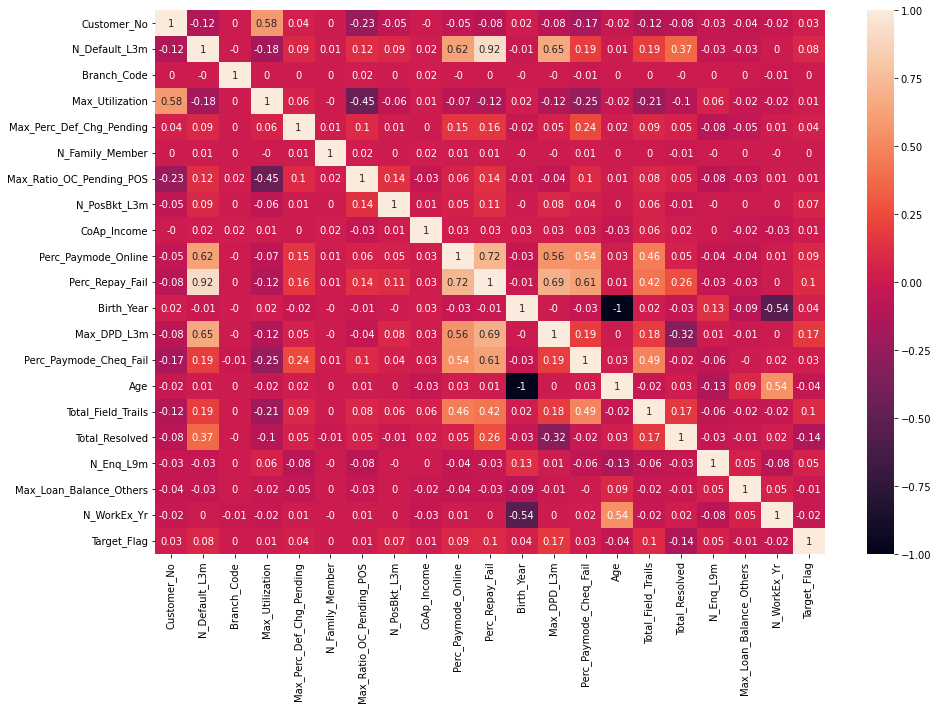

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(matrix,annot=True)
plt.show()

<html>
<br>
</html>

<html>
    <p></p>
    <h3> Removing unwnated columns from dataframe. </h3>
    <br>
</html>

In [23]:
# As we can see from the correlation matrix plot that there are no two columns which are highly correlated.
# So we are gonna consider all columns except the "Birth Year" column as we are having a derived column "Age" which can be derived 
# from Birth Year.
# We are gonna drop the columns Customer_No,Branch_Code as well, Because they doesnot contribute anything to the target.

In [24]:
df=df.drop(columns=['Customer_No','Branch_Code','Birth_Year'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81253 entries, 0 to 81252
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Default_L3m             81253 non-null  int64  
 1   Max_Utilization           81253 non-null  int64  
 2   Max_Perc_Def_Chg_Pending  60175 non-null  float64
 3   N_Family_Member           81253 non-null  int64  
 4   Max_Ratio_OC_Pending_POS  8607 non-null   float64
 5   N_PosBkt_L3m              75915 non-null  float64
 6   CoAp_Income               4118 non-null   float64
 7   Ever_Default_L12M         81253 non-null  object 
 8   Perc_Paymode_Online       81253 non-null  float64
 9   Perc_Repay_Fail           81253 non-null  float64
 10  Max_DPD_L3m               81010 non-null  float64
 11  Perc_Paymode_Cheq_Fail    57776 non-null  float64
 12  Age                       81253 non-null  int64  
 13  Total_Field_Trails        26541 non-null  float64
 14  Total_

In [26]:
# Now, Let's see percentage of null values in each column
columns=np.array(list(df.columns))
Null_Values_Each_Column=[]
for column in columns:
    Null_Values_Each_Column.append(df[column].isnull().sum())
Null_Values_Each_Column=np.array(Null_Values_Each_Column)
Percentage_Null_Values=Null_Values_Each_Column/df.shape[0]

<html>
    <br>
</html>

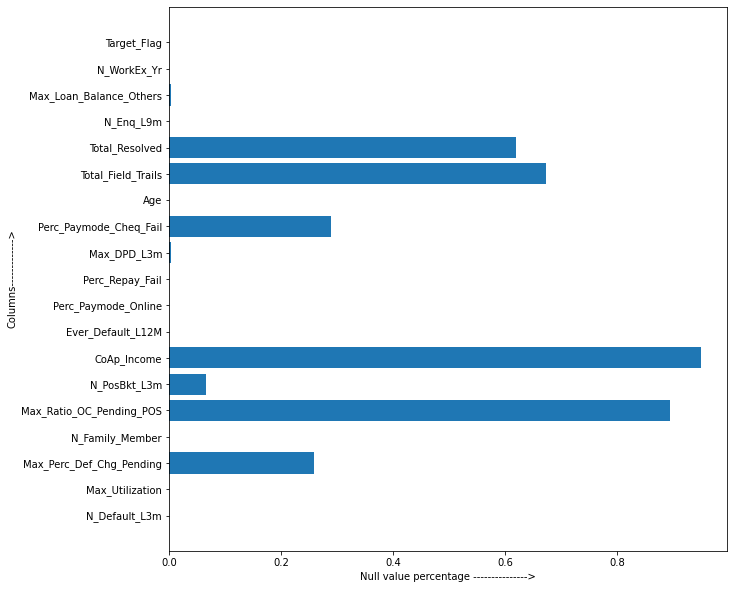

{'N_Default_L3m': 0.0,
 'Max_Utilization': 0.0,
 'Max_Perc_Def_Chg_Pending': 0.2594119601737782,
 'N_Family_Member': 0.0,
 'Max_Ratio_OC_Pending_POS': 0.8940716035100242,
 'N_PosBkt_L3m': 0.06569603583867673,
 'CoAp_Income': 0.9493187943829766,
 'Ever_Default_L12M': 0.0,
 'Perc_Paymode_Online': 0.0,
 'Perc_Repay_Fail': 0.0,
 'Max_DPD_L3m': 0.0029906588064440697,
 'Perc_Paymode_Cheq_Fail': 0.28893702386373427,
 'Age': 0.0,
 'Total_Field_Trails': 0.6733535992517199,
 'Total_Resolved': 0.6191156018854689,
 'N_Enq_L9m': 0.0,
 'Max_Loan_Balance_Others': 0.004196768119330978,
 'N_WorkEx_Yr': 0.0,
 'Target_Flag': 0.0}

In [27]:
# Plotting percentage of null values in each column
plt.figure(figsize=(10,10))
plt.barh(columns,Percentage_Null_Values)
plt.xlabel('Null value percentage --------------->')
plt.ylabel('Columns------------->')
plt.show()

dictionary=dict(zip(columns,Percentage_Null_Values))
dictionary

In [28]:
# From the above bar graph, We can see that there are many columns having null value percentage above 50%.
# Columns like "Max_Ratio_OC_Pending_POS" and "CoAp_Income" are having null values more than 90% of null values so we can ignore them.
# And few columns like "Total_Field_Trails","Total_Resolved" among them are really important to taken care of them (instead of dropping values)
# So I am considering the KNN approaching for imputing the NULL values

In [29]:
df=df.drop(columns=['Max_Ratio_OC_Pending_POS','CoAp_Income'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81253 entries, 0 to 81252
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Default_L3m             81253 non-null  int64  
 1   Max_Utilization           81253 non-null  int64  
 2   Max_Perc_Def_Chg_Pending  60175 non-null  float64
 3   N_Family_Member           81253 non-null  int64  
 4   N_PosBkt_L3m              75915 non-null  float64
 5   Ever_Default_L12M         81253 non-null  object 
 6   Perc_Paymode_Online       81253 non-null  float64
 7   Perc_Repay_Fail           81253 non-null  float64
 8   Max_DPD_L3m               81010 non-null  float64
 9   Perc_Paymode_Cheq_Fail    57776 non-null  float64
 10  Age                       81253 non-null  int64  
 11  Total_Field_Trails        26541 non-null  float64
 12  Total_Resolved            30948 non-null  float64
 13  N_Enq_L9m                 81253 non-null  int64  
 14  Max_Lo

<html>
<br>
</html>

<html>
    <p></p>
    <h3>Let's convert the columns having string to numerical data</h3>
    <br>
</html>

In [31]:
# We have got only one column i.e., "Ever_Default_L12M" to convert the string/object to categorical/numerical data.

In [32]:
encoder=LabelEncoder()
object_columns_values=df['Ever_Default_L12M'].values
oject_columns_values_transformed=encoder.fit_transform(object_columns_values)

In [33]:
df['Ever_Default_L12M'].value_counts()

Yes    64364
No     16889
Name: Ever_Default_L12M, dtype: int64

In [34]:
df['Ever_Default_L12M']=oject_columns_values_transformed

In [35]:
df['Ever_Default_L12M'].value_counts()

1    64364
0    16889
Name: Ever_Default_L12M, dtype: int64

<html>
    <p></p>
    <h3> Filling the null values in the dataframe. </h3>
    <br>
</html>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81253 entries, 0 to 81252
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Default_L3m             81253 non-null  int64  
 1   Max_Utilization           81253 non-null  int64  
 2   Max_Perc_Def_Chg_Pending  60175 non-null  float64
 3   N_Family_Member           81253 non-null  int64  
 4   N_PosBkt_L3m              75915 non-null  float64
 5   Ever_Default_L12M         81253 non-null  int32  
 6   Perc_Paymode_Online       81253 non-null  float64
 7   Perc_Repay_Fail           81253 non-null  float64
 8   Max_DPD_L3m               81010 non-null  float64
 9   Perc_Paymode_Cheq_Fail    57776 non-null  float64
 10  Age                       81253 non-null  int64  
 11  Total_Field_Trails        26541 non-null  float64
 12  Total_Resolved            30948 non-null  float64
 13  N_Enq_L9m                 81253 non-null  int64  
 14  Max_Lo

In [37]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [38]:
x.shape

(81253, 16)

In [39]:
y.shape

(81253,)

In [40]:
imputer=KNNImputer(n_neighbors=285)
x=imputer.fit_transform(x)

In [130]:
z=df.iloc[:,-1].values
np.unique(z,return_counts=True)

(array([0, 1], dtype=int64), array([71469,  9784], dtype=int64))

<html>
    <p></p>
    <h3> Making the dataset balanced. </h3>
    <br>
</html>

In [41]:
smote=SMOTE()

In [42]:
x,y=smote.fit_resample(x,y)

In [43]:
x.shape

(142938, 16)

In [44]:
y.shape

(142938,)

In [46]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([71469, 71469], dtype=int64))

<html>
<br>
</html>

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([14396, 14192], dtype=int64))

<html>
    <br>
</html>

In [49]:
x_train.shape

(114350, 16)

In [50]:
y_train.shape

(114350,)

In [51]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([57073, 57277], dtype=int64))

<html>
<br>
</html>

In [52]:
def print_metrics(y_test,y_pred):
    print("Accuracy Score: ",accuracy_score(y_test,y_pred))
    print("Precision Score: ",precision_score(y_test,y_pred))
    print("recall Score: ",recall_score(y_test,y_pred))

In [53]:
def Disp_Confusion_Matrix_train(y_train,y_pred):
    cm = confusion_matrix(y_train, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 0','class 1'])
    disp.plot()
    plt.title('Training Data Confusion Matrix')
    plt.show()
    print_metrics(y_train,y_pred)
    pass

In [54]:
def Disp_Confusion_Matrix_test(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 0','class 1'])
    disp.plot()
    plt.title('Test Confusion Matrix')
    plt.show()
    print_metrics(y_test,y_pred)
    pass

<html>
<br>
</html>

In [55]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([14396, 14192], dtype=int64))

<html>
<br>
</html>

<html>
    <p></p>
    <h3> Building various classification models and training the data </h3>
    <br>
</html>

In [56]:
clf=SGDClassifier()

In [57]:
clf.fit(x_train,y_train)

SGDClassifier()

In [58]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

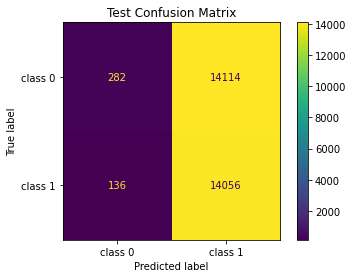

Accuracy Score:  0.5015391073177558
Precision Score:  0.4989705360312389
recall Score:  0.9904171364148816


In [59]:
Disp_Confusion_Matrix_test(y_test,y_pred)

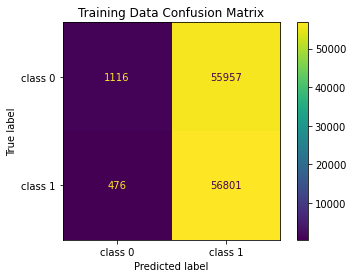

Accuracy Score:  0.5064888500218627
Precision Score:  0.5037425282463328
recall Score:  0.9916895088779091


In [60]:
Disp_Confusion_Matrix_train(y_train,clf.predict(x_train))

<html>
<br>
</html>

In [61]:
naive_bayes_model=GaussianNB()

In [62]:
naive_bayes_model.fit(x_train,y_train)

GaussianNB()

In [63]:
y_pred_nb=naive_bayes_model.predict(x_test)
y_pred_nb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
np.unique(y_pred_nb,return_counts=True)

(array([0, 1], dtype=int64), array([ 3620, 24968], dtype=int64))

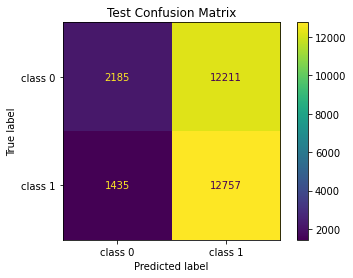

Accuracy Score:  0.5226668532251294
Precision Score:  0.5109339955142582
recall Score:  0.8988866967305524


In [65]:
Disp_Confusion_Matrix_test(y_test,y_pred_nb)

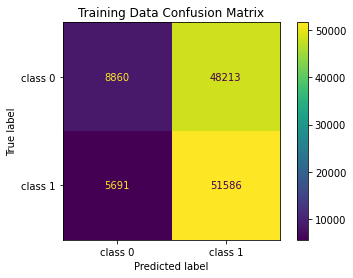

Accuracy Score:  0.5286051595977262
Precision Score:  0.5168989669235162
recall Score:  0.9006407458491192


In [66]:
Disp_Confusion_Matrix_train(y_train,naive_bayes_model.predict(x_train))

<html>
    <br>
</html>

In [67]:
model=LogisticRegression()

In [68]:
model.fit(x_train,y_train)

LogisticRegression()

In [69]:
y_pred1=model.predict(x_test)

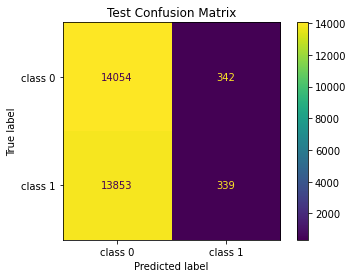

Accuracy Score:  0.5034629914649503
Precision Score:  0.4977973568281938
recall Score:  0.023886696730552423


In [70]:
Disp_Confusion_Matrix_test(y_test,y_pred1)

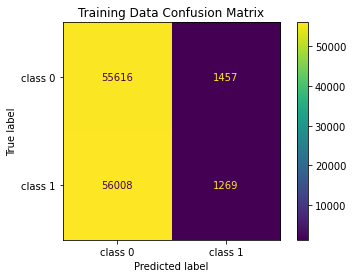

Accuracy Score:  0.4974639265413205
Precision Score:  0.46551724137931033
recall Score:  0.02215548998725492


In [71]:
Disp_Confusion_Matrix_train(y_train,model.predict(x_train))

<html>
<br>
</html>

In [72]:
model2=SVC()

In [73]:
model2.fit(x_train,y_train)

SVC()

In [74]:
y_pred2=model2.predict(x_test)
y_pred2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [75]:
np.unique(y_pred2,return_counts=True)

(array([0, 1], dtype=int64), array([ 7342, 21246], dtype=int64))

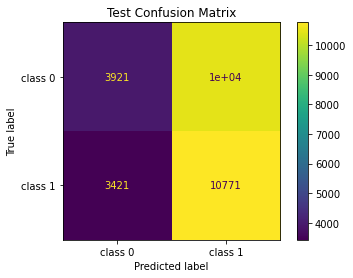

Accuracy Score:  0.5139219252833357
Precision Score:  0.5069660171326368
recall Score:  0.7589487034949267


In [76]:
Disp_Confusion_Matrix_test(y_test,y_pred2)

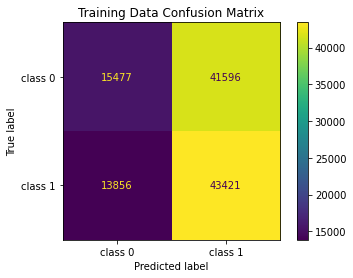

Accuracy Score:  0.515067774376913
Precision Score:  0.5107331474881495
recall Score:  0.7580878886813206


In [77]:
Disp_Confusion_Matrix_train(y_train,model2.predict(x_train))

<html>
<br>
</html>

In [78]:
model3=DecisionTreeClassifier()

In [79]:
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
y_pred3=model3.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [81]:
np.unique(y_pred3,return_counts=True)

(array([0, 1], dtype=int64), array([13971, 14617], dtype=int64))

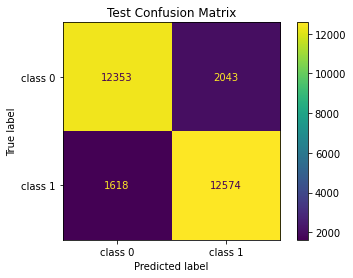

Accuracy Score:  0.8719392752203722
Precision Score:  0.8602312376000547
recall Score:  0.8859921082299888


In [82]:
Disp_Confusion_Matrix_test(y_test,y_pred3)

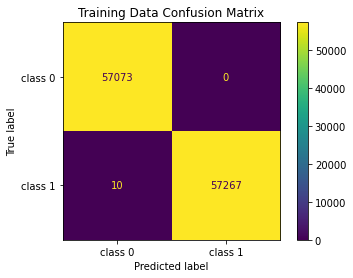

Accuracy Score:  0.99991254919108
Precision Score:  1.0
recall Score:  0.9998254098503763


In [83]:
Disp_Confusion_Matrix_train(y_train,model3.predict(x_train))

<html>
<br>
</html>

In [84]:
model4=RandomForestClassifier()

In [85]:
model4.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred4=model4.predict(x_test)

In [87]:
np.unique(y_pred4,return_counts=True)

(array([0, 1], dtype=int64), array([16086, 12502], dtype=int64))

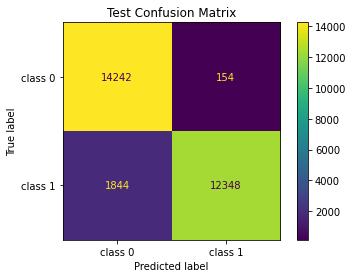

Accuracy Score:  0.9301105358891842
Precision Score:  0.9876819708846585
recall Score:  0.8700676437429538


In [88]:
Disp_Confusion_Matrix_test(y_test,y_pred4)

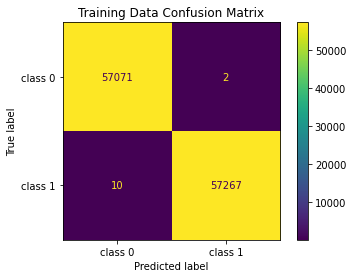

Accuracy Score:  0.999895059029296
Precision Score:  0.9999650770923187
recall Score:  0.9998254098503763


In [89]:
Disp_Confusion_Matrix_train(y_train,model4.predict(x_train))

<html>
<br>
</html>

In [90]:
model5=tf.keras.Sequential()

In [91]:
model5.add(tf.keras.layers.InputLayer(input_shape=(16,),name='Input_Layer'))
model5.add(tf.keras.layers.Dense(16,name='Hidden_Layer_1',activation='relu'))
model5.add(tf.keras.layers.Dense(2,name='Output_Layer',activation='sigmoid'))

In [92]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                272       
                                                                 
 Output_Layer (Dense)        (None, 2)                 34        
                                                                 
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


In [93]:
y_train_copy=y_train.copy()

In [94]:
y_train_copy=tf.one_hot(y_train_copy,depth=2)

In [95]:
y_train_copy

<tf.Tensor: shape=(114350, 2), dtype=float32, numpy=
array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)>

In [96]:
model5.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])

In [97]:
history=model5.fit(x_train,y_train_copy,batch_size=32,epochs=20)

Epoch 1/20
3574/3574 [==============================] - 8s 2ms/step - loss: 170.3719 - accuracy: 0.5169
Epoch 2/20
3574/3574 [==============================] - 7s 2ms/step - loss: 123.5247 - accuracy: 0.5381
Epoch 3/20
3574/3574 [==============================] - 7s 2ms/step - loss: 100.7857 - accuracy: 0.5435
Epoch 4/20
3574/3574 [==============================] - 7s 2ms/step - loss: 120.9907 - accuracy: 0.5454
Epoch 5/20
3574/3574 [==============================] - 7s 2ms/step - loss: 94.9499 - accuracy: 0.5475
Epoch 6/20
3574/3574 [==============================] - 7s 2ms/step - loss: 101.1097 - accuracy: 0.5504
Epoch 7/20
3574/3574 [==============================] - 7s 2ms/step - loss: 105.9732 - accuracy: 0.5529
Epoch 8/20
3574/3574 [==============================] - 7s 2ms/step - loss: 122.9835 - accuracy: 0.5506
Epoch 9/20
3574/3574 [==============================] - 7s 2ms/step - loss: 116.9087 - accuracy: 0.5546
Epoch 10/20
3574/3574 [==============================] - 7s 2ms/s

In [98]:
y_pred5=model5.predict(x_test)

894/894 [==============================] - 1s 1ms/step


In [99]:
y_pred5

array([[8.5653657e-01, 9.7839260e-01],
       [3.9385128e-01, 9.9991822e-01],
       [2.3733284e-09, 1.0000000e+00],
       ...,
       [8.5112661e-01, 9.7577840e-01],
       [4.8990391e-02, 9.9999672e-01],
       [1.9643417e-01, 9.9984252e-01]], dtype=float32)

In [100]:
temp=y_pred5.copy()

In [101]:
temp=temp.round(2)

In [102]:
temp

array([[0.86, 0.98],
       [0.39, 1.  ],
       [0.  , 1.  ],
       ...,
       [0.85, 0.98],
       [0.05, 1.  ],
       [0.2 , 1.  ]], dtype=float32)

In [103]:
acc=[]

In [104]:
for i in range(len(temp)):
    idx=np.argmax(temp[i],axis=0)
    acc.append(idx)

In [105]:
acc=np.array(acc)
acc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [106]:
np.unique(acc,return_counts=True)

(array([0, 1], dtype=int64), array([ 4602, 23986], dtype=int64))

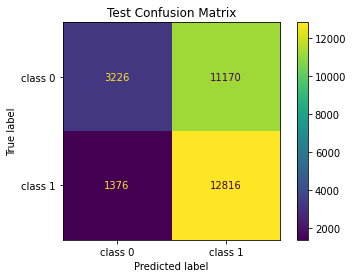

Accuracy Score:  0.5611445361690219
Precision Score:  0.5343116818143917
recall Score:  0.90304396843292


In [107]:
Disp_Confusion_Matrix_test(y_test,acc)

In [108]:
acc=[]
x_train_pred=model5.predict(x_train)

3574/3574 [==============================] - 5s 1ms/step


In [109]:
for i in range(len(x_train_pred)):
    if x_train_pred[i][0]>=x_train_pred[i][1]:
        acc.append(0)
    else:
        acc.append(1)

In [110]:
acc=np.array(acc)

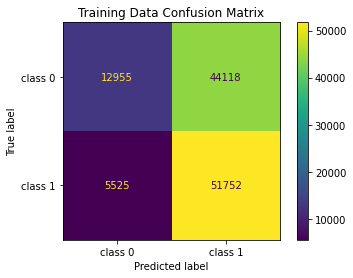

Accuracy Score:  0.5658679492785308
Precision Score:  0.5398143319077918
recall Score:  0.9035389423328736


In [111]:
Disp_Confusion_Matrix_train(y_train,acc)

In [112]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 3574}

In [113]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

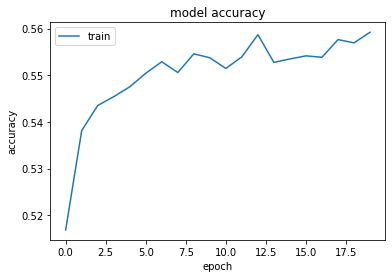

In [114]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

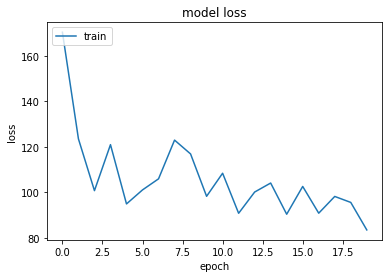

In [115]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

<html>
    <br>
</html>

In [116]:
xgboost=GradientBoostingClassifier()

In [117]:
xgboost.fit(x_train,y_train)

GradientBoostingClassifier()

In [118]:
y_pred_xgboost=xgboost.predict(x_test)

In [119]:
np.unique(y_pred_xgboost,return_counts=True)

(array([0, 1], dtype=int64), array([16285, 12303], dtype=int64))

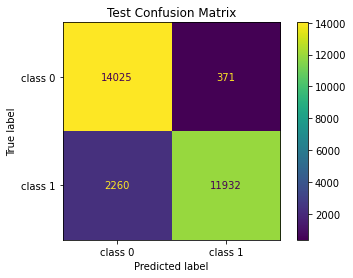

Accuracy Score:  0.9079683783405624
Precision Score:  0.9698447533122003
recall Score:  0.8407553551296505


In [120]:
Disp_Confusion_Matrix_test(y_test,y_pred_xgboost)

In [121]:
temp_scores=xgboost.predict(x_train)

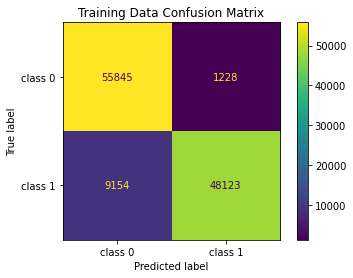

Accuracy Score:  0.9092085701792741
Precision Score:  0.975117018905392
recall Score:  0.8401801770344117


In [122]:
Disp_Confusion_Matrix_train(y_train,temp_scores)

<html>
    <br>
</html>

In [123]:
KNN_model=KNeighborsClassifier(n_neighbors=255)

In [124]:
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=255)

In [125]:
y_pred_knn=KNN_model.predict(x_test)

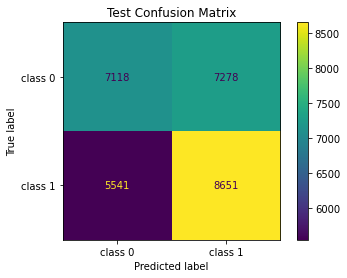

Accuracy Score:  0.5515950748565832
Precision Score:  0.5430974951346601
recall Score:  0.6095687711386697


In [126]:
Disp_Confusion_Matrix_test(y_test,y_pred_knn)

In [127]:
temp_scores=KNN_model.predict(x_train)

In [128]:
np.unique(temp_scores,return_counts=True)

(array([0, 1], dtype=int64), array([51279, 63071], dtype=int64))

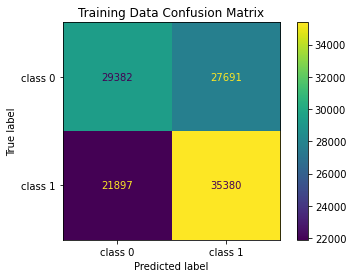

Accuracy Score:  0.5663489287275907
Precision Score:  0.5609551140777853
recall Score:  0.6176999493688566


In [129]:
Disp_Confusion_Matrix_train(y_train,temp_scores)

<html>
    <br>
</html>

<html>
    <p></p>
    <h3> Choosing the best model </h3>
    <br>
</html>

In [131]:
# From all the models we have evaluated above, The RandomForestClassifier algorithm gives the best metrics both for the training data and test data.
# So we are gonna consider RandomForestClassifier for the further testing.

In [132]:
import pickle

In [133]:
filename = 'finalized_model.sav'
pickle.dump(model4, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9301105358891842
